In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

In [2]:
df_angry = pd.read_csv('df_angry.csv')
df_disgusted = pd.read_csv('df_disgust.csv')
df_happy = pd.read_csv('df_happy.csv')
df_neutral = pd.read_csv('df_neutral.csv')
df_sad = pd.read_csv('df_sad.csv')
df_surprise = pd.read_csv('df_surprise.csv')

In [3]:
data = pd.concat([df_angry, df_disgusted, df_happy, df_neutral, df_sad, df_surprise], axis=0)

In [4]:
data["emotion"] = ["angry"]*len(df_angry) + ["disgusted"]*len(df_disgusted) + ["happy"]*len(df_happy) + ["neutral"]*len(df_neutral) + ["sad"]*len(df_sad) + ["surprised"]*len(df_surprise)
data["emotion"]

0           angry
1           angry
2           angry
3           angry
4           angry
          ...    
3807    surprised
3808    surprised
3809    surprised
3810    surprised
3811    surprised
Name: emotion, Length: 25867, dtype: object

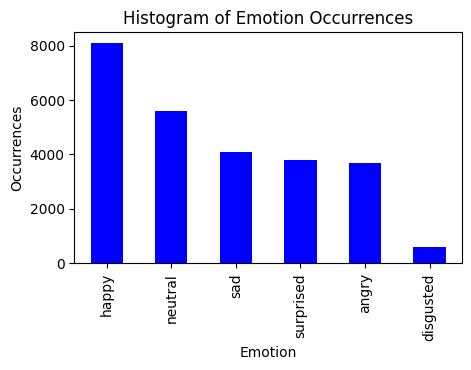

In [5]:
plt.figure(figsize=(5, 3))
emotion_counts = data["emotion"].value_counts()
emotion_counts.plot(kind='bar', color='blue')
plt.title('Histogram of Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Occurrences')
plt.show()

In [6]:
y = data["emotion"]
X = data.drop(["emotion"], axis=1)

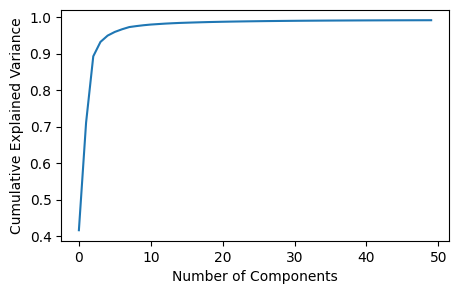

Top Cumulative Explained Variance:  0.9916827302501072


In [7]:
n_components = 50
pca = decomposition.PCA(n_components=n_components)
pca.fit(X.values)

plt.figure(figsize=(5, 3))
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_sum)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

print("Top Cumulative Explained Variance: ", cumulative_sum[n_components-1])

In [8]:
original_feature_names = list(X.columns)

for component_num, component in enumerate(pca.components_):
    sorted_features_indices = component.argsort()[::-1]
    top_feature_names = [original_feature_names[idx] for idx in sorted_features_indices]
    print(f"Top features for Principal Component {component_num + 1}:")
    print("Positive-contributing features:")
    for feature_name in top_feature_names[:10]:
        print(f"- {feature_name}")
    print("Negative-contributing features:")
    for feature_name in top_feature_names[-10:][::-1]:
        print(f"- {feature_name}")
    print()

Top features for Principal Component 1:
Positive-contributing features:
- 186
- 264
- 468
- 646
- 722
- 116
- 908
- 576
- 254
- 712
Negative-contributing features:
- 569
- 503
- 665
- 779
- 597
- 603
- 737
- 667
- 713
- 587

Top features for Principal Component 2:
Positive-contributing features:
- 795
- 345
- 731
- 577
- 273
- 759
- 301
- 117
- 757
- 299
Negative-contributing features:
- 186
- 264
- 354
- 274
- 468
- 454
- 430
- 254
- 116
- 68

Top features for Principal Component 3:
Positive-contributing features:
- 304
- 296
- 754
- 350
- 792
- 352
- 342
- 800
- 398
- 280
Negative-contributing features:
- 676
- 20
- 218
- 594
- 134
- 664
- 206
- 568
- 598
- 674

Top features for Principal Component 4:
Positive-contributing features:
- 286
- 312
- 140
- 70
- 468
- 454
- 186
- 68
- 274
- 254
Negative-contributing features:
- 744
- 766
- 908
- 712
- 646
- 530
- 894
- 722
- 528
- 732

Top features for Principal Component 5:
Positive-contributing features:
- 187
- 647
- 469
- 909
- 265
- 

In [9]:
principal_components = pca.transform(X)

c:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [10]:
pc_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(n_components)])

In [11]:
pc_df["target"] = y.to_list()

In [12]:
pc_df.to_csv("principal_components_with_labels.csv", index=False)

In [13]:
import joblib

joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']